In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, PrecisionRecallDisplay,precision_recall_curve

sns.set_style("whitegrid")

In [2]:
import tensorflow as tf

In [3]:
# We import the dataframe with the 8 features we are considering
df=pd.read_csv("cover_my_med_df.csv")

In [4]:
# We clean the dataframe
df=df.drop('Unnamed: 0',axis=1)

In [23]:
features= df.columns[:-1]

In [29]:
features

Index(['rejected_code', 'drug_type', 'correct_diagnosis', 'tried_and_failed',
       'contraindication', 'is_holiday', 'is_weekday', 'is_workday'],
      dtype='object')

In [5]:
# Split the data:
X=df.drop('pa_approved',axis=1).values
y=df['pa_approved'].values

In [6]:
# Perform a train-test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               shuffle=True,
                                               random_state=213,
                                               test_size=.20)

In [7]:
# Perform a validation-train split
X_tt, X_val, y_tt, y_val = train_test_split(X, y,
                                               shuffle=True,
                                               random_state=213,
                                               test_size=.15)

Here we buold a feedforwardNeural Network model with two layers:

In [8]:
## Important the relevant libraries
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import Input
from keras import Model

## For y when training the network
from keras.utils.np_utils import to_categorical

In [9]:
## Create an empty model object here
model1 =  models.Sequential() 

## Add the Dense layes with 50 nodes, 20 and 10 nodes:
model1.add(layers.Dense(50, activation='relu', input_shape=(8,)))
model1.add( layers.Dense(20, activation='relu'))


## Add the Dense output layer.
model1.add(layers.Dense(2, activation='softmax'))

## Compile the network
model1.compile(optimizer = 'rmsprop' ,
                 loss = 'categorical_crossentropy' ,
                 metrics = ['accuracy'] )

## Train the model for 40 epochs
n_epochs = 40

## fit the model 
history1 = model1.fit(X_tt,
                       to_categorical(y_tt),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val, to_categorical(y_val)))



Epoch 1/40
923/923 [==============================] - 3s 3ms/step - loss: 0.3950 - accuracy: 0.8057 - val_loss: 0.3730 - val_accuracy: 0.8148
Epoch 2/40
923/923 [==============================] - 3s 3ms/step - loss: 0.3746 - accuracy: 0.8132 - val_loss: 0.3729 - val_accuracy: 0.8150
Epoch 3/40
923/923 [==============================] - 3s 3ms/step - loss: 0.3740 - accuracy: 0.8138 - val_loss: 0.3718 - val_accuracy: 0.8150
Epoch 4/40
923/923 [==============================] - 2s 3ms/step - loss: 0.3738 - accuracy: 0.8134 - val_loss: 0.3714 - val_accuracy: 0.8149
Epoch 5/40
923/923 [==============================] - 3s 3ms/step - loss: 0.3736 - accuracy: 0.8135 - val_loss: 0.3727 - val_accuracy: 0.8144
Epoch 6/40
923/923 [==============================] - 3s 3ms/step - loss: 0.3735 - accuracy: 0.8136 - val_loss: 0.3735 - val_accuracy: 0.8138
Epoch 7/40
923/923 [==============================] - 3s 3ms/step - loss: 0.3735 - accuracy: 0.8133 - val_loss: 0.3737 - val_accuracy: 0.8138
Epoch 

In [11]:
#Print the accuracy score for the test data:
accuracy_score (np.argmax(model1.predict(X_test), axis=1), y_test)

3475/3475 [==============================] - 5s 1ms/step


0.8150479805020191

In [11]:
# Print the confusion matrix
confusion_matrix (np.argmax(model1.predict(X_test), axis=1), y_test)

3475/3475 [==============================] - 5s 2ms/step


array([[17258,  8120],
       [12453, 73360]])

In [15]:
# Predict on the test set:
y_pred=np.argmax(model1.predict(X_test), axis=1)

3475/3475 [==============================] - 7s 2ms/step


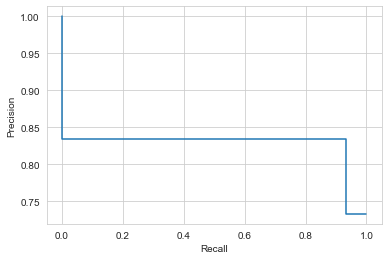

In [16]:
# Plot the Precision-Recall curve.
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
# Compute the f_1 score:


In [17]:
from sklearn.manifold import TSNE

In [26]:
# Extract the last layer of the model:

model2 = Model(inputs=model1.input, outputs=model1.layers[-2].output)
embed=model2(X_test)
labels = np.argmax(model1.predict(X_test), axis=1)

3475/3475 [==============================] - 5s 1ms/step


In [27]:
# Reduce the dimention using the TSNE algorithm
tsne = TSNE(n_components=2).fit_transform(embed)

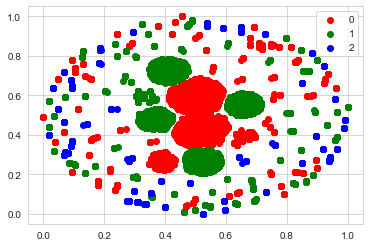

In [36]:
def scale_to_01_range(x):

    value_range = (np.max(x) - np.min(x))
    starts_from_zero = x - np.min(x)
    return starts_from_zero / value_range

tx = tsne[:, 0]
ty = tsne[:, 1]

tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

colors = ['red', 'green','blue']
fig = plt.figure()
ax = fig.add_subplot(111)
for idx, c in enumerate(colors):
    indices = [i for i, l in enumerate(X_test) if idx == l[0]]
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    ax.scatter(current_tx, current_ty, c=c, label=idx)

ax.legend(loc='best')
plt.show()